In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize
import gower
from scipy.spatial import distance_matrix
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Trip
## 数据处理

In [2]:
trip=pd.read_csv('trip.csv',index_col=0)
print(trip.shape)
trip.head()

(490642, 10)


,用户ID,进站位置_东西,出站位置_东西,进站位置_环线,出站位置_环线,早晚高峰,换乘,乘坐时间（s）,价格,优惠类别
0,3104833538,浦西,浦西,内,内,False,True,761,3,False
1,3104833538,浦西,浦西,内,内,True,True,1039,3,False
2,2801795078,浦西,浦东,中,内,False,True,2815,5,False
3,2804416518,浦东,浦东,内,内,True,False,626,3,False
4,2804416518,浦东,浦东,内,内,False,False,11072,5,False


In [3]:
# 系统抽样
# 抽取用户ID尾号为888的所有trip
row=pd.read_csv('samplelabel.csv')
row1=row.loc[:,['trip1%','passenger1%']]
row1=row1.dropna()
row1=row1.astype(int)
row1['trip1%']=row1['trip1%']-1
print(len(row1))
tsample=trip.iloc[row1['trip1%'],:]
tsample.head()

2672


,用户ID,进站位置_东西,出站位置_东西,进站位置_环线,出站位置_环线,早晚高峰,换乘,乘坐时间（s）,价格,优惠类别
67,3101687888,浦东,浦西,外外,内,False,True,3253,5,True
68,3101687888,浦西,浦东,中,外外,False,True,3409,6,False
208,2902982888,浦西,浦西,中,内,False,False,846,3,True
209,2902982888,浦西,浦西,内,中,True,False,939,4,False
319,3104833888,浦西,浦西,外,外,True,False,37507,4,False


# Gower distance

In [4]:
#根据gower距离计算相似度矩阵
dis=gower.gower_matrix(trip.iloc[row1['trip1%'],1:])
pd.DataFrame(dis)

,0,1,2,3,4,5,6,7,8,9,...,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671
0,0.000000,0.565157,0.357130,0.681001,0.751045,0.678571,0.678944,0.455048,0.676382,0.468106,...,0.680386,0.569291,0.677145,0.445004,0.565819,0.356165,0.454982,0.556825,0.446188,0.346077
1,0.565157,0.000000,0.477843,0.579491,0.648851,0.577061,0.466323,0.446131,0.334132,0.699929,...,0.356655,0.578892,0.353413,0.454605,0.353198,0.476878,0.353473,0.344204,0.566900,0.689012
2,0.357130,0.477843,0.000000,0.453908,0.534102,0.678560,0.567076,0.365045,0.365934,0.222358,...,0.565633,0.676729,0.679985,0.578793,0.457978,0.556520,0.346593,0.578083,0.688720,0.233275
3,0.681001,0.579491,0.453908,0.000000,0.302416,0.335763,0.446501,0.244471,0.245359,0.231549,...,0.445058,0.333932,0.337189,0.458219,0.559626,0.565576,0.337129,0.457509,0.345924,0.334923
4,0.751045,0.648851,0.534102,0.302416,0.000000,0.411098,0.411470,0.428316,0.316316,0.422855,...,0.524024,0.524040,0.409672,0.418271,0.520568,0.866470,0.409731,0.418982,0.419455,0.411937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,0.356165,0.476878,0.556520,0.565576,0.866470,0.455373,0.566111,0.586303,0.809413,0.556385,...,0.564962,0.453866,0.456798,0.577829,0.457013,0.000000,0.678961,0.577118,0.465533,0.676755
2668,0.454982,0.353473,0.346593,0.337129,0.409731,0.556922,0.446184,0.463029,0.241563,0.346457,...,0.447627,0.558753,0.333393,0.232201,0.555830,0.678961,0.000000,0.231490,0.343058,0.335539
2669,0.556825,0.344204,0.578083,0.457509,0.418982,0.343968,0.455452,0.564889,0.454517,0.466836,...,0.456895,0.456910,0.120421,0.445155,0.565080,0.577118,0.231490,0.000000,0.444918,0.455919
2670,0.446188,0.566900,0.688720,0.345924,0.419455,0.454605,0.343867,0.565214,0.454991,0.466362,...,0.456421,0.456436,0.454228,0.112295,0.454443,0.465533,0.343058,0.444918,0.000000,0.566556


/var/folders/wg/s03vct1d44q_5m_8t5j8x41h0000gn/T/ipykernel_90968/3760391697.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link=shc.linkage(dis,method='average')


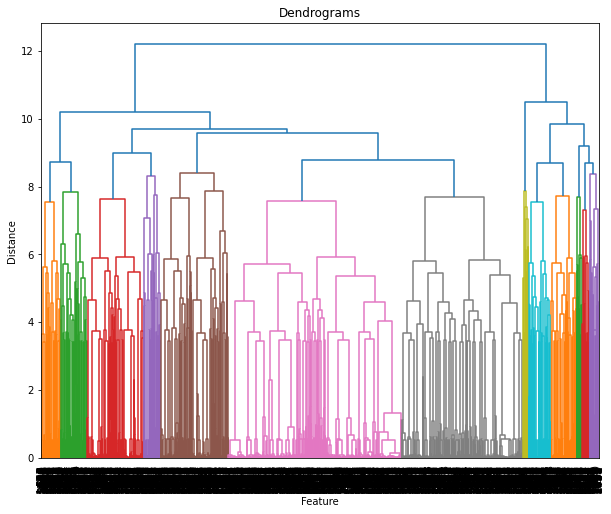

In [60]:
#df_sample=df.iloc[:300,['z-乘坐时间','z-价格']]
plt.figure(figsize=(10, 8))  
plt.title("Dendrograms")
plt.xlabel('Feature')
plt.ylabel('Distance')
#plt.hlines(4,0,100000)
link=shc.linkage(dis,method='average')
dend = shc.dendrogram(link,leaf_rotation=90.,leaf_font_size=11.)

In [61]:
Silhouette=[0]
for i in range(1,15):
    cluster = AgglomerativeClustering(n_clusters=i,affinity = 'precomputed',linkage='average')
    labels = cluster.fit_predict(dis) # 训练数据
    #b=a.copy()
    #b['Cluster_Labels']=labels
    #SSE.append(sse2(b))
    if i!=1:
        Silhouette.append(silhouette_score(dis,labels,metric='precomputed'))

n_cluster=3, Silhouette score= 0.22691934


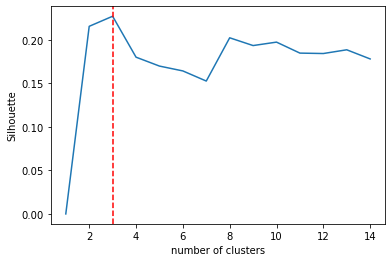

In [63]:
#Silhouette
plt.plot(range(1,15),Silhouette)
plt.ylabel('Silhouette')
plt.xlabel('number of clusters')
plt.axvline(x=3,ls='--',c='red')
print('n_cluster=3, Silhouette score=',Silhouette[2])

In [5]:
cluster = AgglomerativeClustering(n_clusters=8,affinity = 'precomputed',linkage='average')
labels = cluster.fit_predict(dis)
gow=trip.iloc[row1['trip1%'],1:]
gow['Cluster_Labels']=labels

# 欧式距离

In [6]:
df=tsample.copy()
map1 = {label:idx for idx, label in enumerate(np.unique(df.进站位置_东西))}
df.进站位置_东西 = df.进站位置_东西.map(map1)
df.出站位置_东西 = df.出站位置_东西.map(map1)
print('进/出站位置_东西',map1)

#map2 = {label:idx for idx, label in enumerate(np.unique(df.进站位置_环线))}
map2={'内': 0, '中': 1/3, '外': 2/3, '外外': 3/3}
df.进站位置_环线 = df.进站位置_环线.map(map2)
df.出站位置_环线 = df.出站位置_环线.map(map2)
print('进/出站位置_环线',map2)

map3 = {label:idx for idx, label in enumerate(np.unique(df.早晚高峰))}
df.早晚高峰 = df.早晚高峰.map(map3)
df.换乘 = df.换乘.map(map3)
df.优惠类别 = df.优惠类别.map(map3)
print('true/false',map3)
#standardize
m1=df['乘坐时间（s）'].mean()
a=df['乘坐时间（s）']-m1
a=abs(a)
s1=sum(a)/len(df['乘坐时间（s）'])
df['z-乘坐时间']=(df['乘坐时间（s）']-m1)/s1

m1=df['价格'].mean()
a=df['价格']-m1
a=abs(a)
s1=sum(a)/len(df['价格'])
df['z-价格']=(df['价格']-m1)/s1

del df['乘坐时间（s）']
del df['价格']

进/出站位置_东西 {'浦东': 0, '浦西': 1}
进/出站位置_环线 {'内': 0, '中': 0.3333333333333333, '外': 0.6666666666666666, '外外': 1.0}
true/false {False: 0, True: 1}


In [7]:
df.columns=['ID', 'in_ew', 'out_ew', 'in_loop', 'out_loop', 'peak', 'transfer',
       'discount', 'z-time','z-price']
df.head()

,ID,in_ew,out_ew,in_loop,out_loop,peak,transfer,discount,z-time,z-price
67,3101687888,0,1,1.000000,0.000000,0,1,1,0.555305,1.131257
68,3101687888,1,0,0.333333,1.000000,0,1,0,0.667906,2.406127
208,2902982888,1,1,0.333333,0.000000,0,0,1,-1.182077,-1.418484
209,2902982888,1,1,0.000000,0.333333,1,0,0,-1.114949,-0.143614
319,3104833888,1,1,0.666667,0.666667,1,0,0,25.279974,-0.143614


In [9]:
dscale=df.iloc[:,1:].values
#df['z-time']=df['z-time'].reshape(-1, 1)
dscale=normalize(df.iloc[:,1:].values)

In [10]:
def sse(data):
    sse=0
    cen=data.groupby('Cluster_Labels').mean()
   # x=pd.DataFrame( gower.gower_matrix(dscale,center))
    x = pd.DataFrame(distance_matrix(dscale,cen))
    x['Cluster_Labels']=data['Cluster_Labels']
    for i in range(x.shape[0]):
        for j in range(4):
            if x['Cluster_Labels'][i]==j:
                sse=sse+(x.iloc[i,j])*(x.iloc[i,j])
    return(sse)

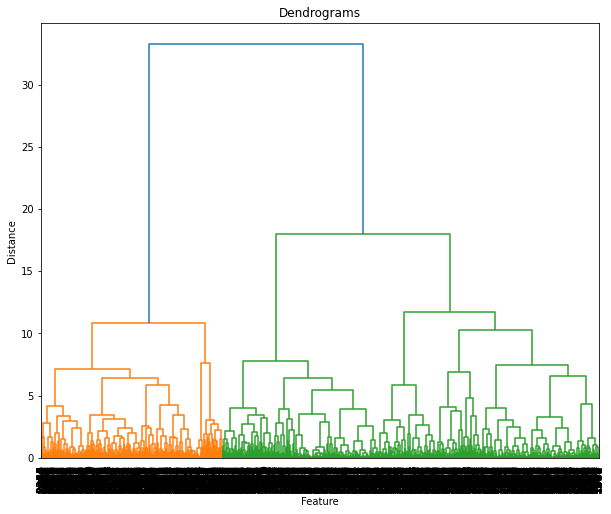

In [64]:
link=shc.linkage(dscale, method='ward')
plt.figure(figsize=(10, 8))  
plt.title("Dendrograms")
plt.xlabel('Feature')
plt.ylabel('Distance')
#plt.hlines(4,0,100000)
#link=shc.linkage(dis,method='complete')
dend = shc.dendrogram(link,leaf_rotation=90.,leaf_font_size=11.)

In [14]:
SSE=[]
Silhouette=[0]
for i in range(1,9):
    cluster = AgglomerativeClustering(n_clusters=i,affinity = 'euclidean',linkage='ward')
    labels = cluster.fit_predict(dscale) # 训练数据
    b=pd.DataFrame(dscale,columns=df.columns[1:])
    b['Cluster_Labels']=labels
    SSE.append(sse(b))
    if i!=1:
        Silhouette.append(silhouette_score(dscale,labels,metric='euclidean'))

n_cluster=6, SSE= 405.39130261317274


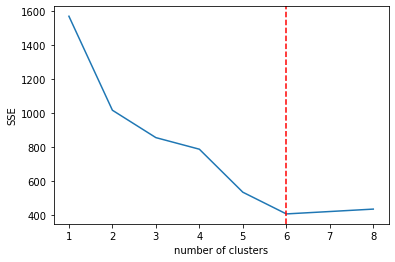

In [15]:
plt.plot(range(1,9),SSE)
plt.ylabel('SSE')
plt.xlabel('number of clusters')
plt.axvline(x=6,ls='--',c='red')
print('n_cluster=6, SSE=',SSE[5])

n_cluster=6, Silhouette score= 0.24590336815093097


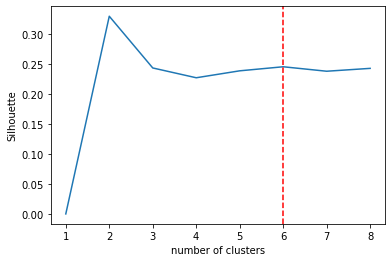

In [16]:
plt.plot(range(1,9),Silhouette)
plt.ylabel('Silhouette')
plt.xlabel('number of clusters')
plt.axvline(x=6,ls='--',c='red')
print('n_cluster=6, Silhouette score=',Silhouette[5])

In [17]:
cluster = AgglomerativeClustering(n_clusters=6,affinity = 'euclidean',linkage='ward')
labels = cluster.fit_predict(dscale)
euc=pd.DataFrame(dscale,columns=df.columns[1:])
euc['Cluster_Labels']=labels

(array([745., 128., 559., 280., 742., 218.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <BarContainer object of 6 artists>)

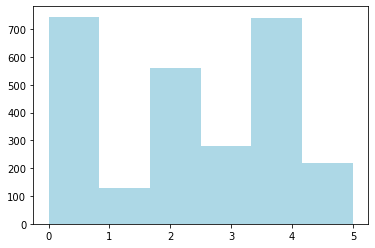

In [18]:
plt.hist(labels, bins=6, facecolor="lightblue")

In [88]:
euc=euc.sort_values('Cluster_Labels')
euc1=euc.copy()
del euc1['Cluster_Labels']

In [89]:
#相似性矩阵
do=distance_matrix(euc1.values,euc1.values)
pd.DataFrame(do)

,0,1,2,3,4,5,6,7,8,9,...,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671
0,0.000000,0.489120,0.587035,0.621266,0.433971,0.004954,0.629548,0.396250,0.135787,0.438685,...,1.301454,1.407090,1.072011,1.137179,1.040465,1.033890,1.141188,0.973798,1.138334,1.048473
1,0.489120,0.000000,0.711162,0.530456,0.130619,0.489415,0.736531,0.203416,0.433670,0.534269,...,1.311350,1.159119,0.892734,0.932986,1.083075,0.875734,1.125492,1.055140,0.997928,0.910647
2,0.587035,0.711162,0.000000,0.751308,0.684648,0.587944,0.869461,0.697084,0.602549,0.747710,...,1.119997,1.236412,1.223961,1.035722,0.832515,0.914881,0.942101,0.825322,1.044790,0.940546
3,0.621266,0.530456,0.751308,0.000000,0.539944,0.623715,0.687567,0.587805,0.608145,0.700175,...,1.306885,1.220468,1.145948,1.155179,1.198210,1.116291,1.233501,1.193279,1.181165,1.126414
4,0.433971,0.130619,0.684648,0.539944,0.000000,0.434010,0.725843,0.139891,0.413080,0.574896,...,1.335410,1.204389,0.931681,0.934639,1.073198,0.855847,1.138740,1.041688,0.977293,0.894579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,1.033890,0.875734,0.914881,1.116291,0.855847,1.033269,1.179197,0.858461,1.036130,1.089801,...,1.054162,0.868998,1.030697,0.601940,0.596194,0.000000,0.862302,0.601848,0.592780,0.196777
2668,1.141188,1.125492,0.942101,1.233501,1.138740,1.139523,1.022646,1.118190,1.106656,1.093690,...,0.721156,0.943987,1.063713,0.624319,0.804512,0.862302,0.000000,0.777412,0.713804,0.902327
2669,0.973798,1.055140,0.825322,1.193279,1.041688,0.973627,1.167546,1.013457,0.978224,0.990142,...,0.836055,1.082956,1.188498,0.944481,0.245233,0.601848,0.777412,0.000000,0.900179,0.564736
2670,1.138334,0.997928,1.044790,1.181165,0.977293,1.136730,1.061079,0.937572,1.136282,1.135272,...,0.896002,0.753300,0.814412,0.281315,0.976198,0.592780,0.713804,0.900179,0.000000,0.587305


<AxesSubplot:>

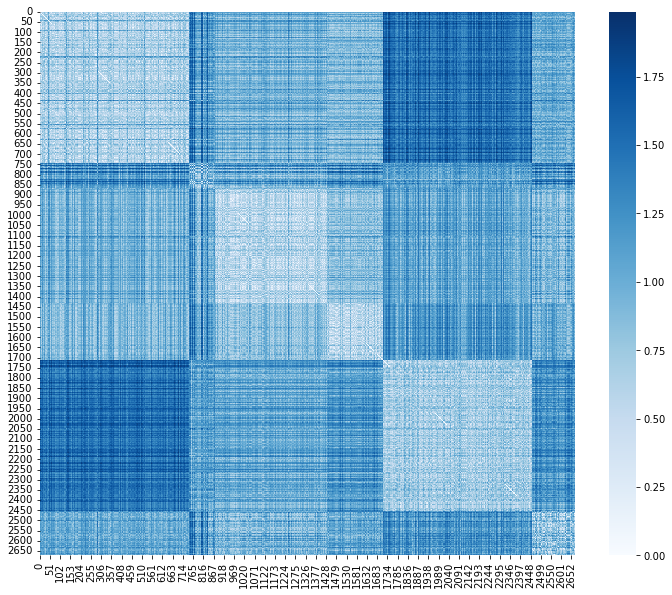

In [90]:
plt.figure(figsize=(12, 10))
sns.heatmap(do,cmap='Blues')

In [69]:
euc.groupby(['Cluster_Labels']).mean()

,in_ew,out_ew,in_loop,out_loop,peak,transfer,discount,z-time,z-price
Cluster_Labels,,,,,,,,,
0,0.289717,0.300741,0.115738,0.100144,0.167712,0.156750,0.105959,-0.400124,-0.578764
1,0.237789,0.277890,0.215109,0.134845,0.157324,0.225888,0.339400,0.365751,-0.042412
2,0.516627,0.387258,0.106573,0.147563,0.237009,0.516627,0.000000,-0.151774,-0.074195
3,0.531589,0.483110,0.198977,0.209733,0.239735,0.000000,0.001312,-0.387241,-0.074670
4,0.269457,0.262269,0.194299,0.208171,0.176893,0.298687,0.019952,0.217154,0.588476
5,0.000000,0.343901,0.168865,0.141432,0.397974,0.456221,0.000000,-0.337310,-0.090496


<AxesSubplot:xlabel='Cluster_Labels', ylabel='z-price'>

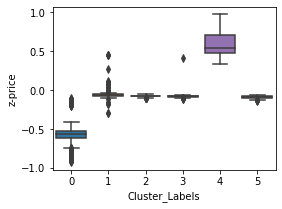

In [77]:
plt.figure(figsize=(4, 3))
sns.boxplot(x='Cluster_Labels', y='z-price', data=euc)

<AxesSubplot:xlabel='Cluster_Labels', ylabel='z-time'>

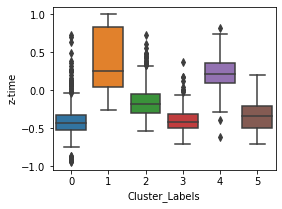

In [78]:
plt.figure(figsize=(4, 3))
sns.boxplot(x='Cluster_Labels', y='z-time', data=euc)

<AxesSubplot:xlabel='Cluster_Labels', ylabel='in_loop'>

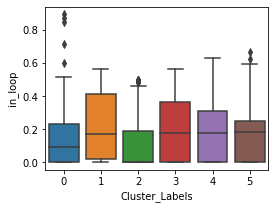

In [84]:
plt.figure(figsize=(4, 3))
sns.boxplot(x='Cluster_Labels', y='in_loop', data=euc)

<AxesSubplot:xlabel='Cluster_Labels', ylabel='peak'>

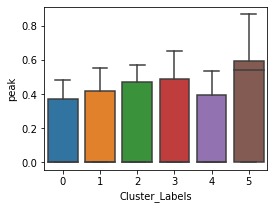

In [80]:
plt.figure(figsize=(4, 3))
sns.boxplot(x='Cluster_Labels', y='peak', data=euc)

# Passenger 
## 数据处理

In [3]:
passenger=pd.read_csv('passenger.csv',index_col=0)
print(passenger.shape)
passenger.head()

(262507, 7)


,用户ID,上班族,换乘,乘坐时间（s）,价格,跨江,乘坐次数
0,6138,True,True,8550,16,True,4
1,7058,False,False,1696,6,False,2
2,70378,True,True,4487,8,False,2
3,71908,True,True,1731,4,False,1
4,83898,True,True,2857,8,False,2


In [4]:
# 系统抽样
# 抽取用户ID尾号为888的所有passenger
row=pd.read_csv('samplelabel.csv')
row1=row.loc[:,['trip1%','passenger1%']]
row1=row1.dropna()
row1=row1.astype(int)
row1['passenger1%']=row1['passenger1%']-1
print(len(row1))
psample=passenger.iloc[row1['passenger1%'],:]
psample.head()

2672


,用户ID,上班族,换乘,乘坐时间（s）,价格,跨江,乘坐次数
125,552888,False,False,3149,8,False,2
404,989888,True,False,37087,5,False,1
597,1337888,False,True,4050,7,True,2
659,1422888,True,False,2193,8,False,2
688,1444888,True,True,5201,7,False,2


## Gower distance

In [5]:
#根据gower距离计算相似度矩阵
dis=gower.gower_matrix(psample.iloc[:,1:])
pd.DataFrame(dis)

,0,1,2,3,4,5,6,7,8,9,...,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671
0,0.000000,0.279396,0.339840,0.168791,0.342397,0.172684,0.178995,0.536438,0.503122,0.217560,...,0.335509,0.382332,0.350035,0.556946,0.502262,0.213140,0.360132,0.334933,0.378496,0.541367
1,0.279396,0.000000,0.606223,0.114854,0.270333,0.109738,0.440374,0.475262,0.442941,0.422311,...,0.277221,0.253749,0.269071,0.481781,0.443801,0.417891,0.288633,0.611130,0.583246,0.458750
2,0.339840,0.606223,0.000000,0.508631,0.335891,0.503515,0.176493,0.205607,0.172291,0.215058,...,0.338011,0.379829,0.347533,0.226115,0.171431,0.210638,0.362635,0.004907,0.042660,0.210536
3,0.168791,0.114854,0.508631,0.000000,0.177855,0.005116,0.343538,0.371895,0.338579,0.382103,...,0.170966,0.213541,0.181244,0.392404,0.337719,0.377683,0.195590,0.503724,0.543038,0.376825
4,0.342397,0.270333,0.335891,0.177855,0.000000,0.172739,0.179050,0.204930,0.172609,0.217615,...,0.006889,0.049053,0.016757,0.223558,0.173469,0.213195,0.360077,0.340797,0.378551,0.207979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,0.213140,0.417891,0.210638,0.377683,0.213195,0.373789,0.034145,0.416245,0.382929,0.004589,...,0.215315,0.173151,0.196438,0.436753,0.382069,0.000000,0.573272,0.214740,0.167978,0.421174
2668,0.360132,0.288633,0.362635,0.195590,0.360077,0.199483,0.539127,0.204647,0.190344,0.577693,...,0.357957,0.409131,0.376834,0.196814,0.191204,0.573272,0.000000,0.358533,0.405295,0.181235
2669,0.334933,0.611130,0.004907,0.503724,0.340797,0.507617,0.180595,0.201505,0.168189,0.219160,...,0.333909,0.383931,0.351635,0.222013,0.167329,0.214740,0.358533,0.000000,0.046762,0.206434
2670,0.378496,0.583246,0.042660,0.543038,0.378551,0.539145,0.199501,0.248267,0.214951,0.172398,...,0.380671,0.338507,0.361794,0.268775,0.214091,0.167978,0.405295,0.046762,0.000000,0.253196


/var/folders/wg/s03vct1d44q_5m_8t5j8x41h0000gn/T/ipykernel_2749/413328935.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link=shc.linkage(dis,method='complete')


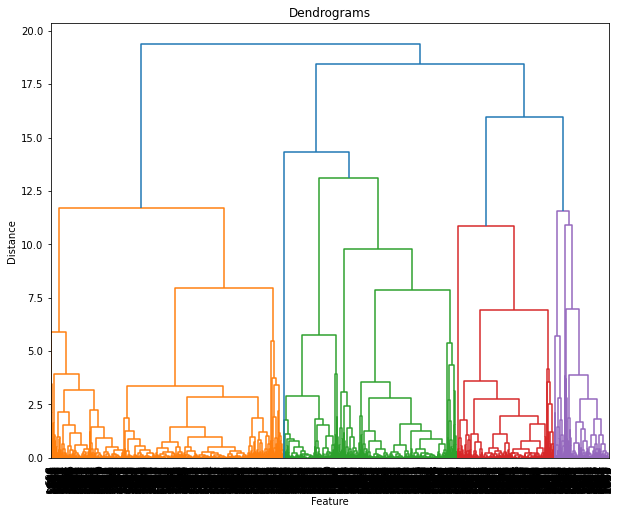

In [6]:
plt.figure(figsize=(10, 8))  
plt.title("Dendrograms")
plt.xlabel('Feature')
plt.ylabel('Distance')
#plt.hlines(11.5,0,100000)
link=shc.linkage(dis,method='complete')
dend = shc.dendrogram(link,leaf_rotation=90.,leaf_font_size=11.)

In [7]:
Silhouette=[0]
for i in range(1,15):
    cluster = AgglomerativeClustering(n_clusters=i,affinity = 'precomputed',linkage='complete')
    labels = cluster.fit_predict(dis) # 训练数据
    #b=a.copy()
    #b['Cluster_Labels']=labels
    #SSE.append(sse2(b))
    if i!=1:
        Silhouette.append(silhouette_score(dis,labels,metric='precomputed'))

n_cluster=6, Silhouette score= 0.7832318


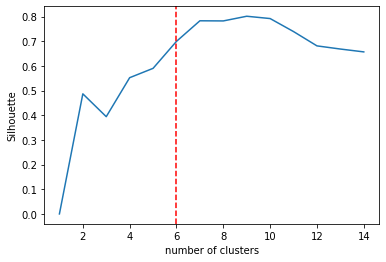

In [8]:
plt.plot(range(1,15),Silhouette)
plt.ylabel('Silhouette')
plt.xlabel('number of clusters')
plt.axvline(x=6,ls='--',c='red')
print('n_cluster=6, Silhouette score=',Silhouette[6])

In [10]:
cluster = AgglomerativeClustering(n_clusters=6,affinity = 'precomputed',linkage='complete')
labels = cluster.fit_predict(dis)
psample['Cluster_Labels']=labels
psample.iloc[:,1:].groupby(['Cluster_Labels']).mean()

/var/folders/wg/s03vct1d44q_5m_8t5j8x41h0000gn/T/ipykernel_2749/2100241801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psample['Cluster_Labels']=labels


,上班族,换乘,乘坐时间（s）,价格,跨江,乘坐次数
Cluster_Labels,,,,,,
0,0.693452,1.0,5390.394345,8.961310,1.0,1.995536
1,0.673469,0.0,3507.619048,7.183673,1.0,1.727891
2,1.000000,0.0,4877.031646,6.569620,0.0,1.812236
3,0.000000,1.0,4260.276056,7.078873,0.0,1.687324
4,0.000000,0.0,3526.765385,5.265385,0.0,1.484615
5,1.000000,1.0,4705.087696,8.367801,0.0,2.020942


(array([672., 147., 474., 355., 260., 764.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <BarContainer object of 6 artists>)

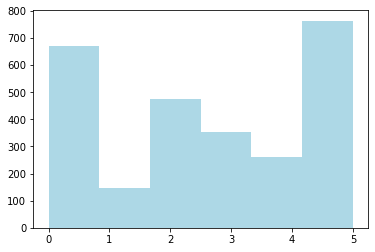

In [11]:
plt.hist(labels, bins=6, facecolor="lightblue")

<AxesSubplot:>

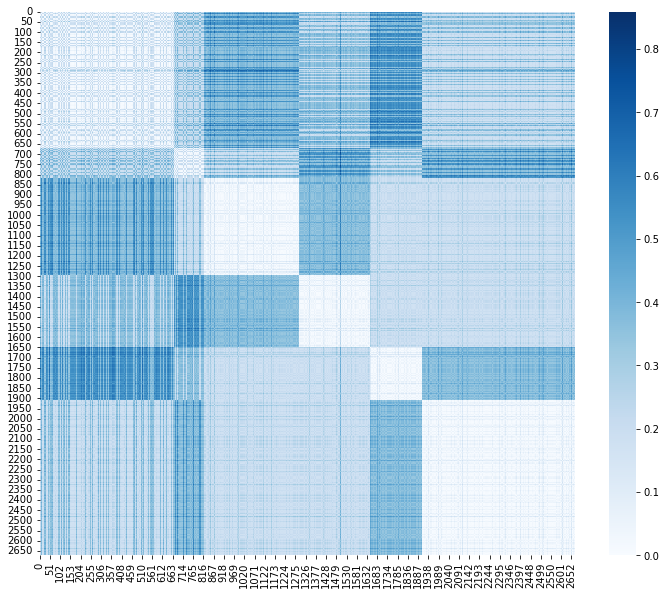

In [12]:
psample=psample.sort_values('Cluster_Labels')
dis=gower.gower_matrix(psample.iloc[:,1:7].values)
plt.figure(figsize=(12, 10))
sns.heatmap(dis,cmap='Blues')